In [1]:
#import dependencies
import pandas as pd
import os
import numpy as np
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#name the current filepath
cwd = os.getcwd()
cwd

'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Projects\\ECHO-Marketing_git'

# iECHO (Attendance) Data

In [24]:
#name the filepath to the data
# former_file_path = "C:\\Users\\ssteffen\\Desktop\\Sam\\Email_data\\email_data.csv"
#to get the current file path, enter 'pwd' in GitBash terminal:
# /c/Users/ssteffen/University of Idaho/Storage-Boise - ECHO/Staff/Sam/Data
root_file_path = 'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\iECHO data\\' 
data_path_2018 = f'{root_file_path}2018_iECHO_data.csv' 
data_path_2019 = f'{root_file_path}2019_iECHO_data.csv' 
data_path_2020 = f'{root_file_path}2020_iECHO_data.csv' 
data_path_2021 = f'{root_file_path}2021_iECHO_data.csv' 
data_path_cumulative = f'{root_file_path}2018-2021_iECHO_attendance_data.csv'

# read the 2018-2021 data into separate dataframes
iecho_data_2018 = pd.read_csv(data_path_2018)
iecho_data_2019 = pd.read_csv(data_path_2019)
iecho_data_2020 = pd.read_csv(data_path_2020)
iecho_data_2021 = pd.read_csv(data_path_2021)
iecho_data_cumulative = pd.read_csv(data_path_cumulative)

# 2019 Attendance Totals

In [33]:
#clean 2019 data in preparation for merging all the dfs into one

#list 2018 data column headers
print(iecho_data_2019.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Date.1', 'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'Attendee County',
       'Attendee Email 1', 'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code',
       'Health Center County'],
      dtype='object')


In [34]:
#eliminate unnecessary columns
iecho_data_2019 = iecho_data_2019.drop(['Date.1',
                                        'First Name',
                                        'Last Name',
                                       ], axis=1)

iecho_data_2019.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
0,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Alexis Shanahan,Attendee,Physician,MD,Internal medicine,1941 N Montclair Dr,Boise,...,83702,Ada / 4,shanaha@slhs.org,eras1314@gmail.com,St. Lukeand#039;s Health System - Boise Medica...,190 E Bannock St,Boise,ID,83702,Ada / 4
1,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Ann Lima,Attendee,Physician,"MD, MPH",NaN,301 Cedar St,Orofino,...,83544,Clearwater / 2,ann.lima@smh-cvhc.org,NaN,Clearwater Valley Hospital and Clinics,301 Cedar St,Orofino,ID,83544,Clearwater / 2
2,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Cheryl Loetscher,Attendee,Nurse Practitioner,APRN,NP,1522 17 St,Lewiston,...,83501,Nez Perce / 2,cherylloetscher@cableone.net,cloetscher@tsmh.org,Clearwater Medical Clinic,1522 17 St,Lewiston,ID,83501,Nez Perce / 2
3,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Chuck Wahl,Attendee,Other - Not Pt. Care,NaN,NaN,"3003 W Main St, Ste 200",Boise,...,83702,Ada / 4,Chuck Wahl,NaN,DEA,"3003 W Main St, Ste 200",Boise,ID,83702,Ada / 4
4,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Doris Ziegeldorf,Attendee,Nurse Practitioner,FNP-BC,"Hormone therapy, weight, fibromyalgia, women’s...",1522 17 St,Lewiston,...,83501,Nez Perce / 2,ladynp1995@hotmail.com,dziegeldorf@tsmh.org,Clearwater Medical Clinic,1522 17 St,Lewiston,ID,83501,Nez Perce / 2


In [35]:
# view the data
iecho_data_2019.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
count,1421,1421,1421,1420,1420,1420,1341,481,1416,1420,...,1420,1420,1421,214,1420,1389,1420,1420,1420,1420
unique,47,3,47,460,2,18,119,120,248,70,...,108,51,463,43,199,188,64,10,95,48
top,2/28/2019,"Opioids, Pain, and Substance Use Disorders",MAT Waiver Training,Lachelle Smith,Attendee,Other - Not Pt. Care,MD,"Primary care integration, depression, anxiety,...",1522 17 St,Boise,...,83702,Ada / 4,lachellesmith@uidaho.edu,dziegeldorf@tsmh.org,University of Idaho - Boise,322 E Front St,Boise,ID,83702,Ada / 4
freq,49,726,66,43,1242,311,172,31,103,473,...,176,570,43,24,154,154,470,1361,274,561


### Fill in Empty Values with NaNs

In [36]:
#print the column titles as a list
# print(iecho_data_2019.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2019 = iecho_data_2019[['Date', 'Clinic Name', 'Session Topic', 'Full Name',
       'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'Attendee County',
       'Attendee Email 1', 'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code',
       'Health Center County']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2019['Clinic Name'].value_counts()

Opioids, Pain, and Substance Use Disorders    726
Behavioral Health in Primary Care             629
X-Waiver Training                              66
Name: Clinic Name, dtype: int64

### Change the Series Names

In [37]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2019['Clinic Name'].value_counts()

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2019['Clinic Name'] = iecho_data_2019['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2019['Clinic Name'] = iecho_data_2019['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2019['Clinic Name'] = iecho_data_2019['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

iecho_data_2019['Clinic Name'].value_counts()

# create a df that will show the attendance count by session

OPSUD       726
BH in PC    629
XWT          66
Name: Clinic Name, dtype: int64

### Create a Session Attendance DataFrame

In [38]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2019 = iecho_data_2019[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2019.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2019_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2019_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2019_df.reset_index(inplace=True)

session_attendance_2019_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,Adolescents and ADHD,2/6/2019,23
1,BH in PC,Adolescents and Suicide,7/17/2019,32
2,BH in PC,Anxiety,11/20/2019,42
3,BH in PC,Application of Principles of CBT-I for Managem...,6/5/2019,30
4,BH in PC,Autism Spectrum Disorders Pt I,4/3/2019,28
5,BH in PC,Autism Spectrum Disorders Pt II,4/17/2019,29
6,BH in PC,CBT for Anger Management,10/2/2019,28
7,BH in PC,Chronic Medical Conditions in Mental Illness,11/6/2019,31
8,BH in PC,Co-Occurring Disorders,5/1/2019,31
9,BH in PC,Co-Occurring Disorders (Grand Rounds at St. Lu...,1/23/2019,8


### Convert the Datatypes

In [39]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2019_df.dtypes
session_attendance_2019_df['Date'] = pd.to_datetime(session_attendance_2019_df['Date'], format='%m/%d/%Y')
# session_attendance_2018_df.dtypes

#reorder the df
session_attendance_2019_df = session_attendance_2019_df.sort_values(by='Date')

### Plot the 2019 Attendance Totals

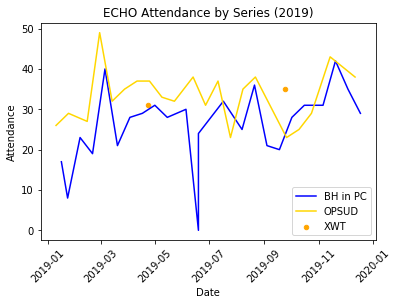

In [40]:
#plot the 2019 session attendance data using a multi-line graph

#slice the 2019 df by series
BH_PC_attendance_2019 = session_attendance_2019_df.loc[(session_attendance_2019_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2019 = BH_PC_attendance_2019['Date'].to_list()
bhpc_attendance_2019 = BH_PC_attendance_2019['Attendance'].to_list()

OPSUD_attendance_2019 = session_attendance_2019_df.loc[(session_attendance_2019_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2019 = OPSUD_attendance_2019['Date'].to_list()
OPSUD_attendance_2019 = OPSUD_attendance_2019['Attendance'].to_list()

XWT_attendance_2019 = session_attendance_2019_df.loc[(session_attendance_2019_df['Clinic Name'] == 'XWT')]
XWT_date_2019 = XWT_attendance_2019['Date'].to_list()
XWT_attendance_2019 = XWT_attendance_2019['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2019, bhpc_attendance_2019, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2019, OPSUD_attendance_2019, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2019, XWT_attendance_2019, label = "XWT", s=20, color='orange')
plt.title("ECHO Attendance by Series (2019)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()